In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Assignment_dataset.xlsx")

In [4]:
df.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [5]:
df.isnull().sum()

Date    0
GHI     0
PR      0
dtype: int64

In [6]:
df.shape

(982, 3)

In [7]:
df.describe()

,GHI,PR
count,982.000000,982.000000
mean,4.644365,72.736197
std,1.015613,7.300572
min,1.413825,60.023886
25%,4.040750,66.319982
50%,4.752150,72.931286
75%,5.323263,79.124728
max,6.947317,84.980120


In [8]:
def num(df):
    if df['GHI']<2:
        return 0
    elif df['GHI']>=2 and df['GHI']<4:
        return 1
    elif df['GHI']>=4 and df['GHI']<6:
        return 2
    else:
        return 3
df['GHI_bins']=df.apply(num,axis=1)

In [9]:
df.head()

,Date,GHI,PR,GHI_bins
0,2019-07-01,3.256608,69.575676,1
1,2019-07-02,3.976767,79.314411,1
2,2019-07-03,2.811867,61.020006,1
3,2019-07-04,3.658408,83.262576,1
4,2019-07-05,5.590683,82.124440,2


In [10]:
df['PR_30'] = df['PR'].rolling(30).mean()

In [11]:
df.head()

,Date,GHI,PR,GHI_bins,PR_30
0,2019-07-01,3.256608,69.575676,1,NaN
1,2019-07-02,3.976767,79.314411,1,NaN
2,2019-07-03,2.811867,61.020006,1,NaN
3,2019-07-04,3.658408,83.262576,1,NaN
4,2019-07-05,5.590683,82.124440,2,NaN


In [12]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d')
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [13]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [14]:
df['date'] = pd.DatetimeIndex(df['Date']).day

In [15]:
df[df['Date']=='2021-06-01']

,Date,GHI,PR,GHI_bins,PR_30,Year,Month,date
701,2021-06-01,6.520442,66.669652,3,72.135612,2021,6,1


In [16]:
def date(df):
    if df['Month']==1:
        return 'Jan'
    elif df['Month']==2:
        return 'Feb'
    elif df['Month']==3:
        return 'Mar'
    elif df['Month']==4:
        return 'Apr'
    elif df['Month']==5:
        return 'May'
    elif df['Month']==6:
        return 'Jun'
    elif df['Month']==7:
        return 'Jul'
    elif df['Month']==8:
        return 'Aug'
    elif df['Month']==9:
        return 'Sep'
    elif df['Month']==10:
        return 'Oct'
    elif df['Month']==11:
        return 'Nov'
    elif df['Month']==12:
        return 'Dec'

df['month1']=df.apply(date,axis=1)

In [17]:
a = np.full(shape = (336,), fill_value = 73.9, dtype = float)
b = np.full(shape = (365,), fill_value = 73.3, dtype = float)
c = np.full(shape = (281,), fill_value = 72.7, dtype = float)
full = np.concatenate([a,b,c])

In [18]:
df['budget_line'] = full

In [19]:
# Points above target budget line

def target(df):
    if df['PR']>=df['budget_line']:
        return 1
    else:
        return 0

df['points_above']=df.apply(target,axis=1)

In [20]:
df.head()

,Date,GHI,PR,GHI_bins,PR_30,Year,Month,date,month1,budget_line,points_above
0,2019-07-01,3.256608,69.575676,1,NaN,2019,7,1,Jul,73.9,0
1,2019-07-02,3.976767,79.314411,1,NaN,2019,7,2,Jul,73.9,1
2,2019-07-03,2.811867,61.020006,1,NaN,2019,7,3,Jul,73.9,0
3,2019-07-04,3.658408,83.262576,1,NaN,2019,7,4,Jul,73.9,1
4,2019-07-05,5.590683,82.124440,2,NaN,2019,7,5,Jul,73.9,1


In [21]:
df['date']=df['date'].astype('str')
df['Year']=df['Year'].astype('str')
df['date1'] = df['date']+'-'+df['month1']+'-'+df['Year']

In [22]:
df['points_above'].value_counts()

0    503
1    479
Name: points_above, dtype: int64

In [23]:
# average pr last 7 day
df['PR_7'] = df['PR'].rolling(7).mean()

# average pr last 60 day
df['PR_60'] = df['PR'].rolling(60).mean()

# average pr last 90 day
df['PR_90'] = df['PR'].rolling(90).mean()

# average pr last 365 day
df['PR_365'] = df['PR'].rolling(365).mean()

In [24]:
df.tail(1)

,Date,GHI,PR,GHI_bins,PR_30,Year,Month,date,month1,budget_line,points_above,date1,PR_7,PR_60,PR_90,PR_365
981,2022-03-08,5.12505,79.911798,2,71.855995,2022,3,8,Mar,72.7,1,8-Mar-2022,73.803662,73.009264,73.050615,72.889515


In [25]:
df['PR'].mean()

72.736196847745

In [26]:
df.head()

,Date,GHI,PR,GHI_bins,PR_30,Year,Month,date,month1,budget_line,points_above,date1,PR_7,PR_60,PR_90,PR_365
0,2019-07-01,3.256608,69.575676,1,NaN,2019,7,1,Jul,73.9,0,1-Jul-2019,NaN,NaN,NaN,NaN
1,2019-07-02,3.976767,79.314411,1,NaN,2019,7,2,Jul,73.9,1,2-Jul-2019,NaN,NaN,NaN,NaN
2,2019-07-03,2.811867,61.020006,1,NaN,2019,7,3,Jul,73.9,0,3-Jul-2019,NaN,NaN,NaN,NaN
3,2019-07-04,3.658408,83.262576,1,NaN,2019,7,4,Jul,73.9,1,4-Jul-2019,NaN,NaN,NaN,NaN
4,2019-07-05,5.590683,82.124440,2,NaN,2019,7,5,Jul,73.9,1,5-Jul-2019,NaN,NaN,NaN,NaN


### 479 points are above budget line

C:\Users\User-1\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User-1\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\User-1\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


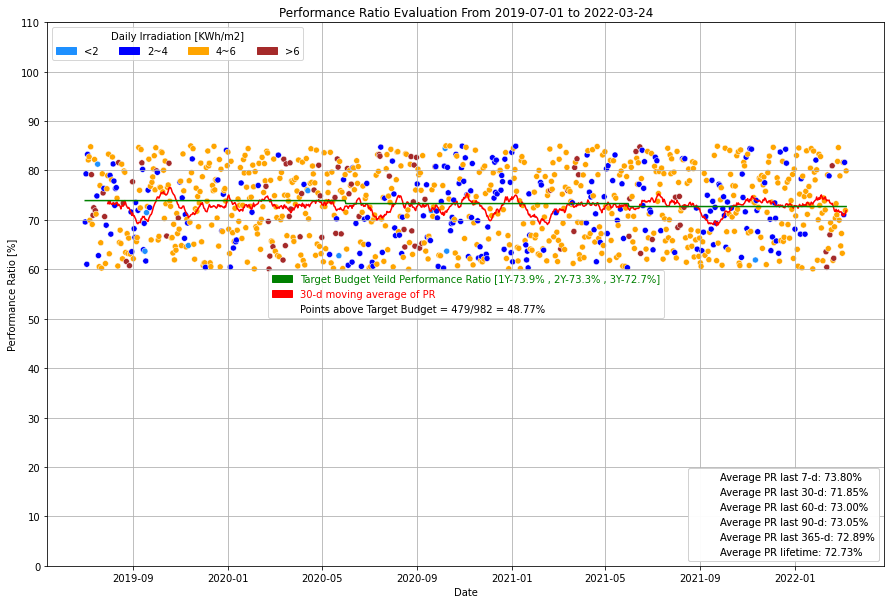

In [29]:
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='dodgerblue', label='<2')
blue_patch = mpatches.Patch(color='blue', label='2~4')
orange_patch = mpatches.Patch(color='orange', label='4~6')
brown_patch = mpatches.Patch(color='brown', label='>6')

#sns.set(rc={'axes.facecolor':'None'})


plt.figure(figsize = (15,10))
plt.ylim(0,100)
sns.scatterplot(df['Date'] , df['PR'] , hue = df['GHI_bins'] , palette = ['dodgerblue','blue','orange','brown'] ,markers = 'd', legend = False)
first_legend = plt.legend(handles = [green_patch,blue_patch,orange_patch,brown_patch] , loc = 'upper left' , ncol = 4)
first_legend.set_title('Daily Irradiation [KWh/m2]')
plt.gca().add_artist(first_legend)


green1_patch = mpatches.Patch(color='green', label='Target Budget Yeild Performance Ratio [1Y-73.9% , 2Y-73.3% , 3Y-72.7%]')
red1_patch = mpatches.Patch(color='red', label='30-d moving average of PR')
black1_patch = mpatches.Patch(color='None', label='Points above Target Budget = 479/982 = 48.77%')
second_legend = plt.legend(handles = [green1_patch,red1_patch,black1_patch] , loc = 'center' , ncol = 1)
li  = ['green' , 'red' , 'black']
for i,text in enumerate(second_legend.get_texts()):
    text.set_color(li[i])
plt.gca().add_artist(second_legend)


patch1 = mpatches.Patch(color='None', label='Average PR last 7-d: 73.80%')
patch2= mpatches.Patch(color='None', label='Average PR last 30-d: 71.85%')
patch3 = mpatches.Patch(color='None', label='Average PR last 60-d: 73.00%')
patch4 = mpatches.Patch(color='None', label='Average PR last 90-d: 73.05%')
patch5 = mpatches.Patch(color='None', label='Average PR last 365-d: 72.89%')
patch6 = mpatches.Patch(color='None', label='Average PR lifetime: 72.73%')
third_legend = plt.legend(handles = [patch1,patch2,patch3,patch4,patch5,patch6] , loc = 'lower right' , ncol = 1)
plt.gca().add_artist(third_legend)


sns.lineplot(df['Date'] , df['PR_30'] , color = 'red')
sns.lineplot(df['Date'] , df['budget_line'] , color = 'green')
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#plt.xticks(['Jul/19' , 'Oct/19' , 'Jan/20' , 'Apr/20' , 'Jul/20' , 'Oct/20'])
plt.title('Performance Ratio Evaluation From 2019-07-01 to 2022-03-24')
plt.ylabel('Performance Ratio [%]')
plt.grid()
plt.show()